## Baseline methods for daily streamflow estimation

scworland@usgs.gov, 11/14/2017

### Preface

This notebook contains notes, computer code, and supporting math for several baseline methods of estimating daily streamflow in ungaged basins.

### Drainage area ratio

Daily streamflows in an ungaged basin $y$ on day $t$ are predicted as:

$$
\hat{Q}_{y,t} = \frac{A_y}{A_x} Q_{x,t}
$$

Where $\hat{Q}_{y,t}$ is the predicted streamflow a basin $y$, $A_y$ is the drainage area for basin $y$, $A_x$ is the drainage area of basin $x$, $Q_{x,t}$ is the known streamflow at basin $x$, and basin $x$ is an index basin for basin $y$. The index gage can be found using various measures of similarity. 

> We could modify this by (1) using a unsupervised learning technique on the covariate data set to select a cluster of basins that are similar to an ungaged basin of interest and then (2) use the average of the drainage area ratios to calculate the daily flow. Similar to using selecting a certain number of nearest neighbors in covariate space rather than geographical space. 

### QPPQ

The QPPQ method involves several steps:

1. Regionalize quantiles of flow duration curves at ungaged sites 
2. Identify "source" flow sites and assign weights to the sites
3. Aggregate FDC information from source sites
4. Convert to discharge and take weighted average at ungaged site

> There are several ways we can handle the QPPQ method. We can either optimize the steps--e.g., use machine learning to regionalize FDC and find donor sites--or we can recreate a "truly" baseline method by following what has been done in previous reports. The latter would allow us to compare our methods to traditional USGS approaches.


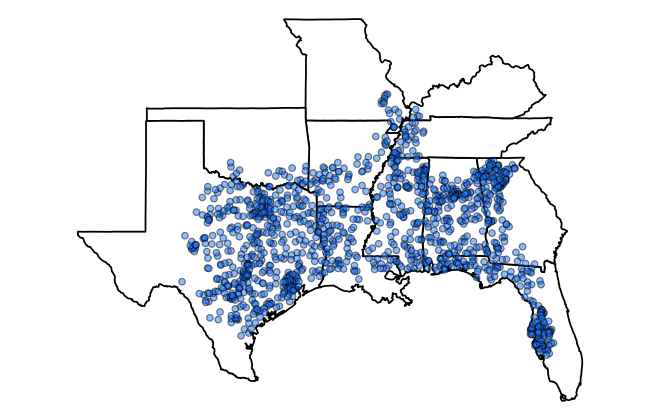

In [13]:
library(tidyverse); library(dataRetrieval); library(lubridate); library(feather)
options(warn = -1)

setwd("~/Documents/Restore")

site_desc <- read_feather("data/basinchars/BASIN_CHAR_TOT.feather") %>%
  mutate(siteno=sprintf("%08d",siteno),
         min_year = year(min_date),
         max_year = year(max_date)) %>%
  select(siteno,da_km2=DASqKm,lat=dec_lat_va,
         lon=dec_long_v,min_year,max_year)

states <- map_data('state', region=c("texas","georgia","florida",
                                     "louisiana","alabama", "tennessee",
                                     "mississippi","arkansas","oklahoma",
                                     "kentucky","missouri")) 

options(repr.plot.width=5.5, repr.plot.height=3.5)
ggplot() + geom_polygon(data=states,aes(long,lat,group=group),color = "black", fill= "white",size=0.5) + 
  geom_point(data=site_desc,aes(lon,lat),fill="dodgerblue",shape=21,alpha=0.5) +
  coord_fixed(1.3) + theme_void()